In [1]:
# Load the MNIST data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv("train.csv")

# print first 5 rows of d0
print(d0.head(5))

# save the labels into a variable l
l = d0["label"]

# Drop the label feature and store the pixel data in d
d = d0.drop("label", axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


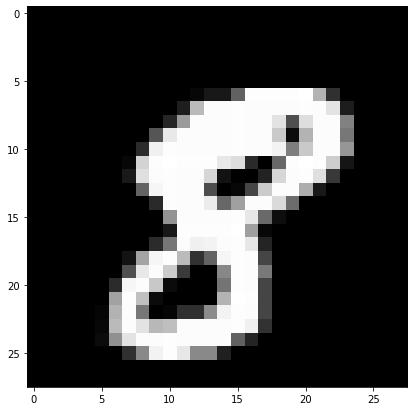

8


In [3]:
# display or plot a number
plt.figure(figsize=(7,7))
idx = 10
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation="none", cmap="gray")
plt.show()

print(l[idx])